In [19]:
import numpy as np

class Node():
    
    def __init__(self, data, parent=None):
        self.data = data
        self.value = np.mean(data[:, -1])
        self.std = np.std(data[:, -1])
        
        self.split_feat_idx = None
        self.split_feat_value = None
        
        self.left = None
        self.right = None
        self.parent = parent

In [63]:
class Tree():

    def __init__(self, data, criterion='mse', error_thres=0.1, split_fold_n=10):
        self.root = Node(data)
        self.current_node = self.root
        self.criterion = criterion
        self.error_thres = error_thres
        self.split_fold_n = split_fold_n
    
    def split(self):
        current_data = self.current_node.data
        current_std = self.current_node.std
        
        current_std_gain = 0
        current_split_value = 0
        current_split_pos = [0, 0]
        print('<<<<<<<<<<<<<<<<<')
        # loop each column of features to search for split position
        for i in range(current_data.shape[1] - 1):
            
            current_data = current_data[current_data[:, i].argsort()]
            current_feature = current_data[:, i]
            current_y = current_data[:, -1]

            self.split_fold_n = len(current_feature) # maybe too slow
            interval = int(len(current_feature) / self.split_fold_n)
            
            for j in range(self.split_fold_n - 1):
                split_pos = (j + 1) * interval
                
                split_std0, split_std1 = np.std(current_y[: split_pos]), np.std(current_y[split_pos:])
                
                std_gain = current_std - split_std0 - split_std1
            
                if std_gain > current_std_gain:
                    print(std_gain, current_std_gain)
                    current_split_pos = [i, split_pos]
                    current_split_value = current_feature[split_pos]
                    current_std_gain = std_gain
        print('>>>>>>>>>>>>>>>>>>>')
        # split 
        self.current_node.split_feat_idx = current_split_pos[0]
        self.current_node.split_feat_value = current_split_value
        
        print('*****', i, current_split_pos[1])
        
        current_data = current_data[current_data[:, current_split_pos[0]].argsort()]
        split_data0, split_data1 = current_data[: current_split_pos[1]], current_data[current_split_pos[1]:]
        
        node0 = Node(data=split_data0, parent=self.current_node)
        node1 = Node(data=split_data1, parent=self.current_node)
        
        self.current_node.left = node0
        self.current_node.right = node1
    
    def check_split(self):
        if len(self.current_node.data) == 1:
            return False
        
        if self.current_node.std < self.error_thres:
            return False
        
        current_node_y = self.current_node.data[:, -1]
        
        print(current_node_y, '-----')
        if len(current_node_y[current_node_y == current_node_y[0]]) == len(current_node_y):
            return False
        
        return True
        
    def generate(self):
        
        if not self.check_split():
            return
        
        self.split()
        
        self.current_node = self.current_node.left
        self.generate()
        
        self.current_node = self.current_node.right
        self.generate()
    
    def reset(self):
        self.current_node = self.root
    
    def predict(self, X):
        
        self.reset()
        
        feat_idx, feat_value = self.current_node.split_feat_idx, self.current_node.split_feat_value
        
        if X[feat_idx] < feat_value:
            
            if self.current_node.left:
                self.current_node = self.current_node.left                
                self.predict(X)
            else:
                return self.current_node.value
        else:
            
            if self.current_node.right:
                self.current_node = self.current_node.right
                self.predict(X)
            else:
                return self.current_node.value
        
    def prune(self):
        pass
            
        

In [64]:
tree = Tree(data)
tree.generate()

[-1.1493464   0.09131401  0.09668352  0.13651039  0.19403525 -0.12383814
  0.26365828  0.41252216  0.44546446  0.47215529 -0.26319138  0.49351799
  0.60530013  0.63450933  0.64144608  1.09900119  0.66957978  0.66968122
  0.73574834  0.75072053  1.4926134   0.8363043   0.8532893   0.87144496
  0.97060533 -0.20183403  0.99131122  0.99472837  0.99825213  0.99999325
  1.21570343  0.98769965  0.98591565  0.9159044   0.91406986 -0.51669013
  0.8775346   0.87063055  0.86993408  0.86523559  0.37007575  0.78464608
  0.63168655  0.53722799  0.45801971  0.08075119  0.43272116  0.34115328
  0.26769953  0.20730318  1.34959235 -0.17645185 -0.20918837 -0.24990778
 -0.28068224 -1.63529379 -0.31247075 -0.31458595 -0.32442911 -0.34965155
 -0.29371122 -0.46921115 -0.56401144 -0.57215326 -0.57488849 -0.95586361
 -0.75923066 -0.78043659 -0.85808859 -0.94589863 -0.6730775  -0.94870673
 -0.97149093 -0.98097408 -0.98568417 -0.20828128 -0.99994398 -0.99703245
 -0.99170146 -0.9732277 ] -----
<<<<<<<<<<<<<<<<<
0

AttributeError: 'NoneType' object has no attribute 'data'

In [40]:
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))
y = y.reshape(-1, 1)

data = np.hstack((X, y))

print(X.shape, y.shape, data.shape)


(80, 1) (80, 1) (80, 2)


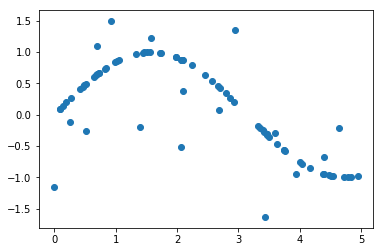

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X, y)